In [71]:
#Generate data
import numpy as np

n = 100
synthetic_data = np.empty((n*n,3))

x = np.linspace(1,20,n)
y = np.linspace(1,20,n)

for i in range(n):
    for j in range(n):
        #synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],(x[i]-10.0)**2-(y[j]-15)**2])
        synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],0.5*(x[i]-10.0)**2-2*y[j]])


#Shuffle contents
np.random.shuffle(synthetic_data)

<IPython.core.display.Javascript object>


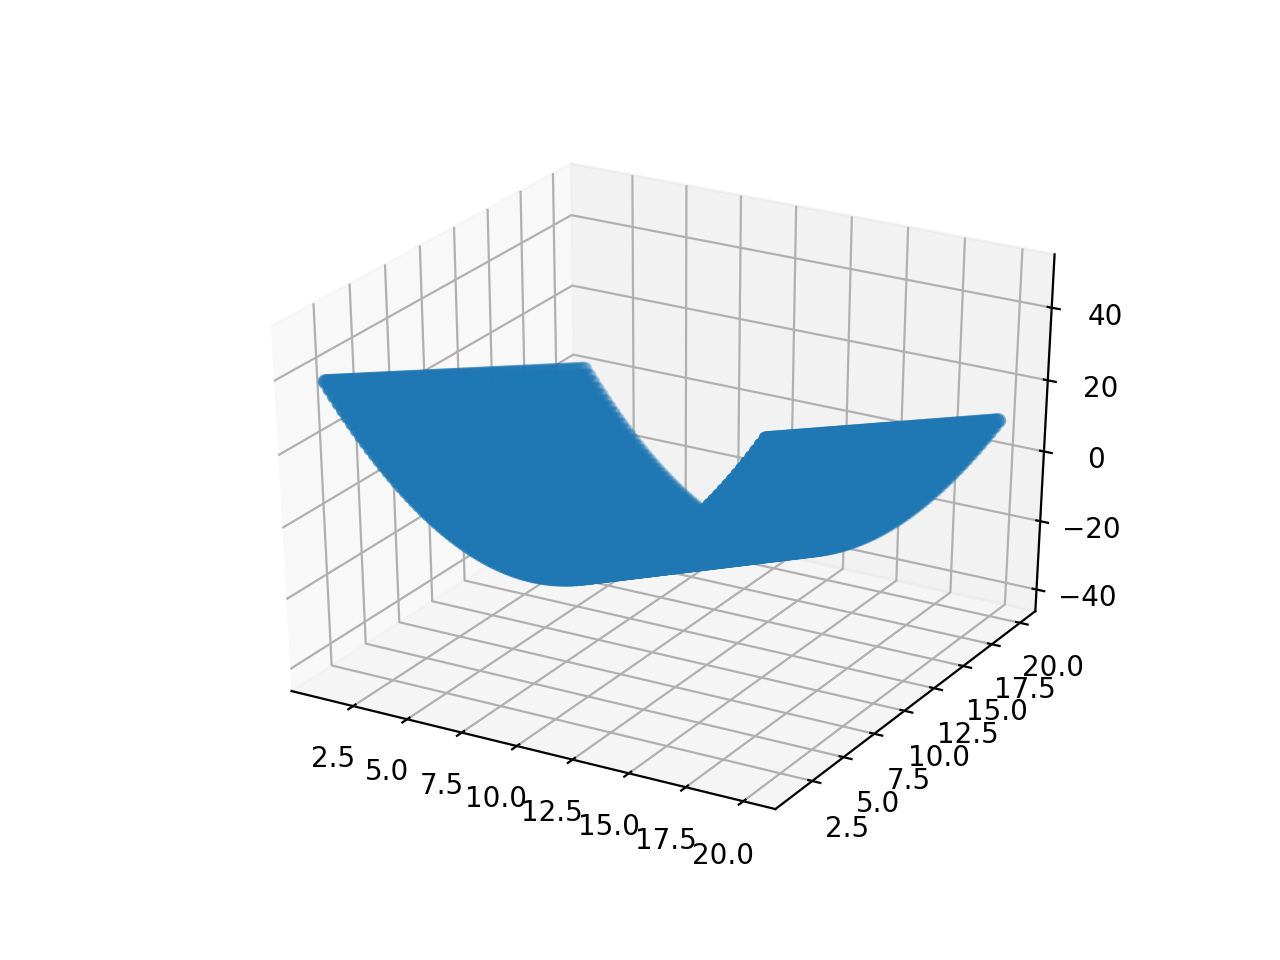

In [72]:
#Graph this data to be sure it is what we want
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_data[:,0], synthetic_data[:,1], synthetic_data[:,2])

In [73]:
#Helper functions
def normalise(x):
    """Convert values to range 0-1"""
    x_h = (x - x.min())*1.0 / (x.max() - x.min())
    
    return x_h, x.min(), x.max()

def un_normalise(x_h, x_min, x_max):
    """Convert values from range 0-1 back to normal"""
    x = (x_max-x_min)*x_h + x_min
    
    return x

In [74]:
#Now let's try with an autoencoder
import tensorflow as tf
#Prepare for training and validation with a 70:30 split
split_size = int(synthetic_data.shape[0]*0.7)

#Normalise values
#x_in, x_min, x_max = normalise(synthetic_data)

x_in = synthetic_data

#Remember that for autoencoders we don't need to have any targets since the values themselves are the targets
#train_x, val_x = x[:split_size], x[split_size:]


# number of neurons in each layer
input_num_units = 3
hidden_num_units = 2
output_num_units = 3

# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
x_h = tf.placeholder(tf.float32, [None, output_num_units])


# define weights and biases of the neural network (refer this article if you don't understand the terminologies)

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units])),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units]))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units])),
    'output': tf.Variable(tf.random_normal([output_num_units]))
}

In [87]:
# hidden = sigmoid(x*w_h+b_h)
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.sigmoid(hidden_layer)
#output_layer = hidden*w_o+b_o
output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']
#Define cost
cost = tf.reduce_mean(tf.pow(output_layer - x_h, 2))
cross_entropy = -tf.reduce_sum(output_layer*tf.log(x_h))
#Choose Optimiser
optimiser = tf.train.RMSPropOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


n_rounds = 10000
batch_size = 10000

In [88]:
#Training loop

#TODO: add validation since it most likely overfits!

for i in range(n_rounds):
    sample = np.random.randint(n*n, size=batch_size)
    batch_xs = x_in[sample][:]
    batch_ys = x_in[sample][:]
    sess.run(optimiser, feed_dict={x: batch_xs, x_h:batch_ys})
    if i % 2500 == 0:
        print i, sess.run(cross_entropy, feed_dict={x: batch_xs, x_h:batch_ys}), sess.run(cost, feed_dict={x: batch_xs, x_h:batch_ys})

0 nan 203.973
2500 nan 27.4175
5000 nan 24.7187
7500 nan 24.4477


In [82]:
print 'W_h:',sess.run(weights['hidden'])
W_h = sess.run(weights['hidden'])
print 'B_h:',sess.run(biases['hidden'])
B_h = sess.run(biases['hidden'])
print 'W_o:',sess.run(weights['output'])
W_o = sess.run(weights['output'])
print 'B_o:',sess.run(biases['output'])
B_o = sess.run(biases['output'])

W_h: [[-0.10732821  0.11540623]
 [-0.00677633  0.05240152]
 [-0.07945811 -0.07805315]]
B_h: [ 1.37938082 -1.85580325]
W_o: [[-23.45080948   1.0519892  -34.70423126]
 [ 19.35103798  13.24154282 -34.39041519]]
B_o: [ 14.12302303   2.75756097  33.68847656]


In [83]:
#downscale synthetic data
reconstructed_data = np.empty((n*n,3))
def sigmoid (x): return 1/(1 + np.exp(-x))  
def relu(x): return np.maximum(x, 0)


for i in range(n*n):    
    reconstructed_data[i,:] = np.dot(sigmoid(np.dot(x_in[i,:],W_h)+B_h),W_o)+B_o
    print np.mean(np.power(reconstructed_data[i,:]-x_in[i,:],2))
#reconstructed_data = un_normalise(reconstructed_data, x_min, x_max)

0.290228683404
30.7797213293
3.74885069714
1.54445534305
5.88017204261
12.7119143271
14.6424609087
23.7527521221
0.758235612155
2.48857793237
21.4642117028
9.82760156148
2.75785354944
33.7299630451
4.50110287709
19.3298954865
2.47522562811
6.91414401989
11.1710351308
7.23469416379
14.5676817722
63.5357638248
6.40181604434
16.8688827994
10.6753521298
13.8386990141
2.6290003626
14.2876485408
3.89177978996
1.8468199264
17.5343560851
14.1912405947
7.6455635921
4.77963375826
7.2372185749
14.7120761445
0.788630228788
21.9513268425
11.5450266658
19.4256376801
8.93579302877
10.4424516203
3.71936242541
1.02182147721
0.65289852606
14.1745030104
3.54909935068
14.8858606481
2.00199971825
16.4609770826
5.96784432008
2.5146823207
3.16857380724
18.6568963575
28.3388175658
19.315416939
3.69782108338
10.2696358697
2.31865012079
16.8454769846
11.3330277936
4.12737867873
3.88021226105
13.9872440848
8.27297605993
3.7649810661
1.20365888477
9.34572003566
2.42773585478
4.47188884752
1.54752228002
5.90379878

1.78788153613
17.5355483093
2.38957242331
11.6708677878
3.67906427707
13.6714775315
18.0964462911
6.71211898274
6.78949832175
2.00951933294
8.10567155074
12.3399670936
18.1602036342
2.60216453934
6.5940831178
17.5064791381
10.7429137084
17.5048603851
4.80824754302
4.43939027898
8.60185603285
2.29361540379
15.452908177
4.5800155736
2.26672750983
13.4803282179
8.37544745525
6.3291419687
3.38422411976
1.17286379095
12.0354819582
11.1646742217
5.28325060476
14.2896182026
12.3379203651
1.22511263753
10.0453133788
3.6791764214
5.47669308262
2.59478528045
18.5307364363
11.3770128565
6.47213719606
2.23949589742
15.612366236
9.16252583321
11.7421537702
12.9325887926
8.43270871687
2.91687025662
5.30712229594
9.11210797808
10.5358626504
10.0773407439
1.75777244872
3.12366209651
15.4311688848
24.2714819437
4.19765655971
16.9226105786
7.48359336817
16.9993232288
12.0594307955
4.64389652499
39.6161264313
12.8439602536
5.1035903468
9.62823502436
3.42363317907
2.55974165222
3.2503135777
10.0176451304


19.290633622
6.67591308111
1.26603366006
17.4592127515
7.16353222279
3.48849102422
0.414072367183
2.59707782137
20.3984090331
0.25770610866
5.42707230881
4.23983842965
8.31403581711
10.3222928572
8.09799208465
9.07479741965
9.17732071282
12.7535585986
1.54001882211
10.5316442426
1.03330431406
8.59658287727
32.9122163947
11.4646076593
5.48150057339
1.84606612275
7.87232641266
3.65321900903
12.4828764696
5.77466405022
9.69596846099
4.67385258778
3.08324601288
7.60771101771
8.94214299125
18.1321316595
3.36906357639
8.07613482361
4.66645519251
7.64902714914
15.5118736016
15.7098681257
5.60875576403
18.7641642135
0.380261368187
5.91340893226
13.4435323854
11.9091910832
1.68090285389
1.7362400075
11.7546922143
8.74882122344
41.5731080174
22.7310528879
12.7403778715
7.01310472527
5.30708132562
1.94443108802
8.75207025564
3.94094991346
5.10775474208
8.95812329117
1.54941153409
26.518807595
4.08719897669
3.76776293105
7.18349560917
0.652221127591
4.21049695437
10.674105717
5.31785489234
13.8787

29.4129627029
1.38601585768
8.54354771177
4.61946438397
3.63641933153
14.1496237766
11.4988827456
3.04685482758
6.63580929943
9.09043324932
9.5160197503
12.7152504302
2.34525259929
20.4619175362
12.0169714116
1.47760709817
3.82745533133
16.3892387125
8.71957744321
11.7171819031
13.8164324319
38.5301204849
11.7394660799
10.3610315014
10.6358339434
2.87673405402
6.75897288562
6.632323139
14.1536946134
4.35916313605
0.418033031105
2.37562970914
0.374484969846
15.9795320337
3.19392543021
7.40053383129
4.58522666372
14.8954911435
41.3390935518
11.9506072301
7.89010335814
3.68562534518
3.22096304998
9.23180173146
3.86868014548
8.62570921089
29.91876785
7.99943728592
13.3281182124
17.8003064138
6.07651979727
10.8555234068
0.166683203752
13.6850103793
3.24938359698
2.37466358548
15.1693101582
20.269790956
5.40209375153
9.37165706467
7.2053556592
18.1799517782
12.2419902814
19.8633097943
6.08251529835
2.17523302467
28.8844918131
4.33918455914
11.089533064
4.91186058286
18.6561128749
0.376627590

11.5643097928
6.67460036666
18.7069285073
25.702356536
6.71780646421
9.89033390779
17.112328027
19.1879848451
16.9697686187
11.1970940933
2.79937196081
11.5541915795
2.34112993076
8.26604823891
0.70186384248
0.501037833921
18.6886267366
8.41381863938
2.97455723107
19.042818558
10.5980915375
12.7468960386
9.55549630062
2.88868802743
1.32486541656
29.1375752022
14.2944399664
7.46120451639
15.7154089903
17.3495208119
16.5955959832
17.5862864401
7.48736408181
7.55586222681
8.20495034775
11.3414433894
10.2970942886
0.311143640669
3.4331226424
4.56637645411
11.3782336695
13.1502325581
0.159531151258
16.2689347957
11.5436221138
3.56980854713
13.6804323044
0.835215858283
1.17505527286
7.04830673018
15.081534588
7.01178031773
4.60469202891
17.6772387059
4.79232857369
10.6935611295
38.2365450429
19.1861581311
6.39486850365
13.3549098489
0.3055103114
3.08984898587
18.5518787772
6.50710814899
6.59408646613
3.42216205195
20.28733259
10.4794083604
6.05710446582
13.871812057
12.2751121412
5.816646486

0.385011458956
14.3355656659
12.085141032
4.19875245372
6.87101273142
9.01912043814
2.5526819352
30.0431970939
1.20825156205
4.38934835429
0.694785311682
3.49381262398
20.6908546135
14.9993699875
26.222152953
2.04676821065
7.86039667143
2.78546299225
2.88195039059
5.84168291608
17.1384720625
19.5276277415
7.15966550865
18.3347751586
14.3417829726
13.1314954378
1.03082044853
11.032789498
7.85338406398
19.3388363784
3.15389555261
15.4332719497
31.6229241979
3.87808713767
20.5040242877
1.53659746236
4.96143042539
4.92184234231
21.1725594884
5.90031208512
2.94190991577
12.5475270518
6.17437493411
14.9210898409
11.5274609043
3.28391215561
11.0383136212
9.83405719513
0.701620149594
10.5266964638
2.34909837949
12.012090574
22.5980282847
6.90159955991
20.1658321357
11.5634117662
19.6062891457
25.5825208423
9.21014737677
10.3464275378
11.2207173458
9.60061374215
2.16097241828
15.4462389237
7.35635705448
7.60402078706
10.2507178106
15.3698466424
9.14878920258
12.2373304594
21.2085324427
9.493882

3.2688885851
5.31190873532
13.2580722404
12.6017498531
0.586134583459
7.44581723341
5.09531147062
4.62594828499
2.79619047815
9.31214553179
14.9515669612
15.0156519638
26.4504681308
20.1570450263
5.22609445009
27.1362689477
0.199539409147
16.0881868246
15.7959342083
19.8778726001
9.79855809278
5.98270076266
5.05948018834
5.59288960697
14.7948683469
10.3876909906
10.1221024926
9.25596216181
5.11862287808
14.4692895329
17.1312398325
2.74532077392
14.9563545637
9.4359940846
3.8643987734
8.80006028759
4.03077512634
17.2202657911
5.82963791636
0.352350574876
19.9181444236
13.6497986702
1.30896277411
0.722987947029
30.3098051418
25.5819298274
13.9538194936
5.33321181471
3.41456701142
8.28632488487
4.74082022706
1.53368055627
3.66516257881
11.7686209045
2.03284080137
4.60464841899
18.1555860328
6.20362429559
4.42861274671
18.9085600711
42.7243677839
7.32485140872
3.27039703446
6.41641567045
5.11175687329
8.85618575998
0.720224448848
6.10836348388
28.6968907615
17.3951049434
19.802520514
1.343

3.74484740767
3.65248053095
11.9668036524
2.87551572926
19.0610705476
7.53688857676
4.0223703676
15.7797882875
14.3400052973
0.847536481955
6.37316702821
5.17304919028
23.875482666
0.570810742574
13.6229833405
4.80097304138
6.24355022264
0.590148283715
2.96774767682
8.92708298183
1.76043170923
4.30178211188
2.93317187261
0.695822316151
8.59136965907
14.402643835
1.16496980141
0.529967901994
5.30724422481
20.5056725415
9.55614423282
3.57776355664
14.3079490302
3.30997669969
8.70964634993
4.28400905063
1.6543251428
6.53047705295
9.59246312774
0.424105404365
15.6133868667
1.80784352761
9.51717744237
6.84474514892
4.35184197213
12.014242834
18.0004146341
4.25467834239
3.28920958582
5.92443322682
18.7893875105
15.940461095
17.5710204128
5.04731524129
1.19913504076
8.09415065339
5.544973698
7.95329214229
18.4980619974
8.3379365746
8.73193452347
9.30724811548
14.2912133895
14.1436117937
1.6743776558
17.4926360726
5.73137122699
0.723220284397
11.1859897361
0.421223525996
15.0267639125
5.200491

<IPython.core.display.Javascript object>


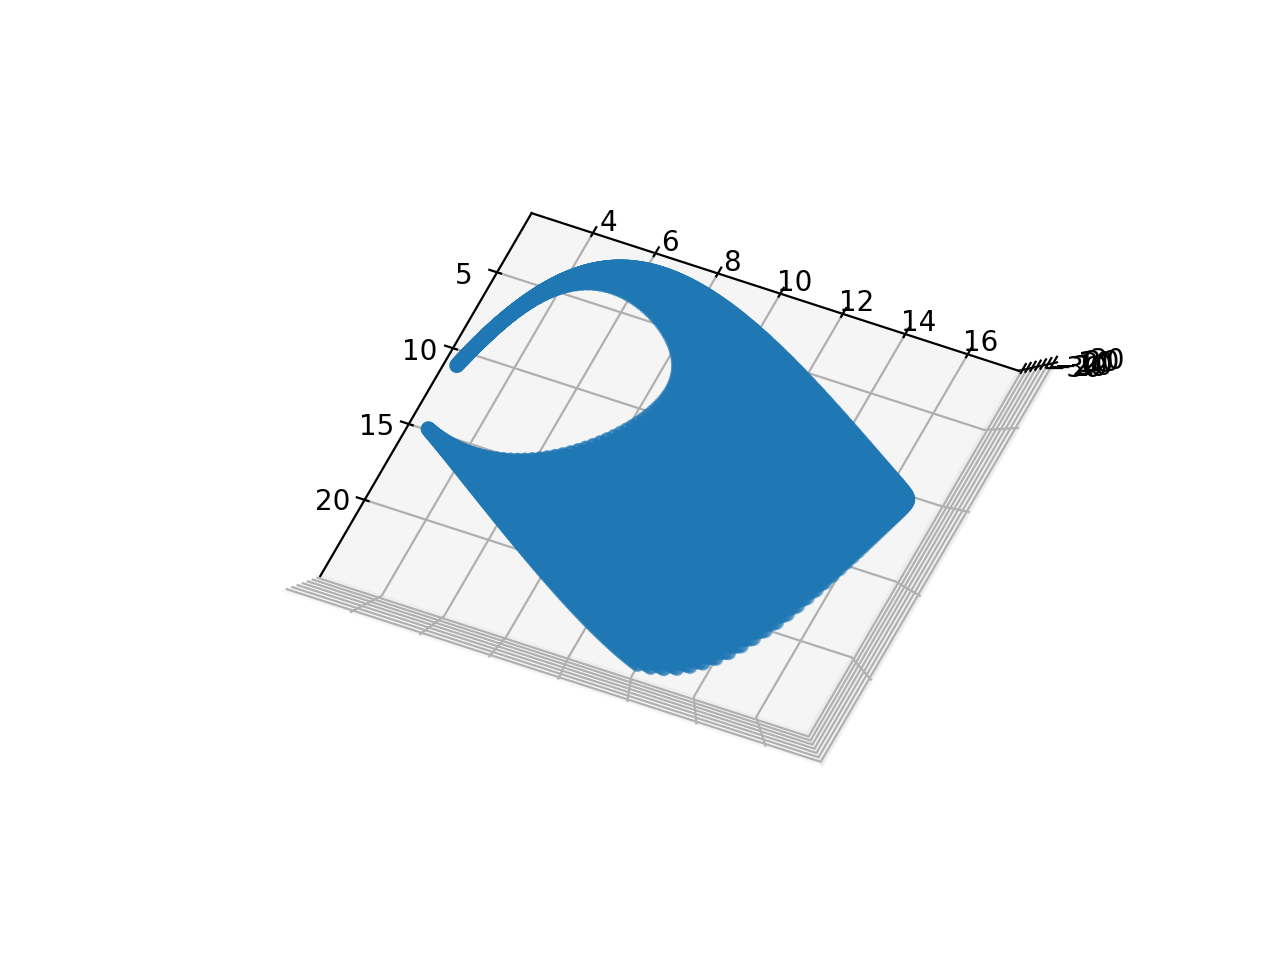

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], reconstructed_data[:,2])